# LLN and CLT

This lecture illustrates two of the most important theorems of probability and statistics: The law of large numbers (LLN) and the central limit theorem (CLT).

The CLT refines the LLN.

The LLN gives conditions under which sample moments converge to population moments as sample size increases.

The CLT provides information about the rate at which sample moments converge to population moments as sample size increases.

In [1]:
# Import the main packages
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import t, beta, lognorm, expon, gamma, uniform, cauchy
from scipy.stats import gaussian_kde, poisson, binom, norm, chi2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from scipy.linalg import inv, sqrtm

The classical law of large numbers concerns independent and identically distributed (IID) random variables. In probability theory and statistics, a collection of random variables is independent and identically distributed if each random variable has the same probability distribution as the others and all are mutually independent. This property is usually abbreviated as i.i.d. or iid or IID.

What does IID mean?

* random variable is a function mapping from events (sample space) to real number
* independent means your measurement is orthogonal (or the value you measure for one observation is independent from others)
* identical means your pdf or cdf for random variable should be same (or Identically distributed relates to the probability distribution that describes the characteristic you are measuring. Specifically, one probability distribution should adequately model all values you observe in a sample. Consequently, a dataset should not contain trends because they indicate that one probability distribution does not describe all the data).

### Why are iid data important?

Identically distributed data are vital for most hypothesis tests because they indicate you are assessing a stable phenomenon. For example, if you measure the strength of a product and the mean strength increases as you collect more samples, it’s hard to draw conclusions. What is the mean strength of the product? It depends on when you measure it! Is it stronger than a particular value? That also depends on when you measure it!

Of course, if your analysis compares groups, the groups can have different means, proportions, or other properties, but each group must be identically distributed.

### Assessing IID in your Dataset

How do you know whether your data are independent and identically distributed? Here are some tips!

For independence, consider how you collected your data. Did you use random sampling, or did you obtain a sample of convenience? If you used readily available subjects, do you believe sequential observations are related or influence each other, such as siblings’ IQ scores?

Understanding your data collection process and the subject area can help you determine whether your observations are independent. Random sampling is great way to help ensure independent observations!

### The Classical LLN

The classical law of large numbers concerns independent and identically distributed (IID) random variables. Let $X_1, \cdots, X_n$ be independent and identically distributed scalar random variables, with __common distribution__ $F$.

When it exists, let $\mu$ denote the common mean of this sample:

$$\mu = E X = \int x F(dx)$$
In addition, let
$$\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$$

Kolmogorov's strong law states that, if $E|X|$ is finite, then

$$P \{\bar{X}_n \to \mu \ as \ n \to \infty \} = 1$$

The weaker version of the LLN can be proved based on the _chebyshev inequality_, which tells us that

$$P\{ |\bar{X}_n - \mu | \geq \epsilon \} \leq \frac{E[(\bar{X}_n - \mu)^2]}{\epsilon^2}$$

Now observe that

\begin{align}
E[(\bar{X}_n - \mu)^2] & =  \{ [ \frac{1}{n} \sum_{i=1}^n (X_i - \mu)] ^2 \}  \\
& = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n E (X_i - \mu) (X_j - \mu) \\
& = \frac{\sigma^2}{n}
\end{align}

Here the crucial step is at the third equality, which follows from independence. Independence means that if $i \neq j$, then the covariance term $E(X_i - \mu) (X_j - \mu)$ drops out.

In a long sequence, this would be true if, for example, $E(X_i−μ)(X_j−μ)$ approached zero when the difference between i and j became large.

In other words, the LLN can still work if the sequence $X_1,…,X_n$ has a kind of “asymptotic independence”, in the sense that correlation falls to zero as variables become further apart in the sequence.

This idea is very important in time series analysis, and we’ll come across it again soon enough.

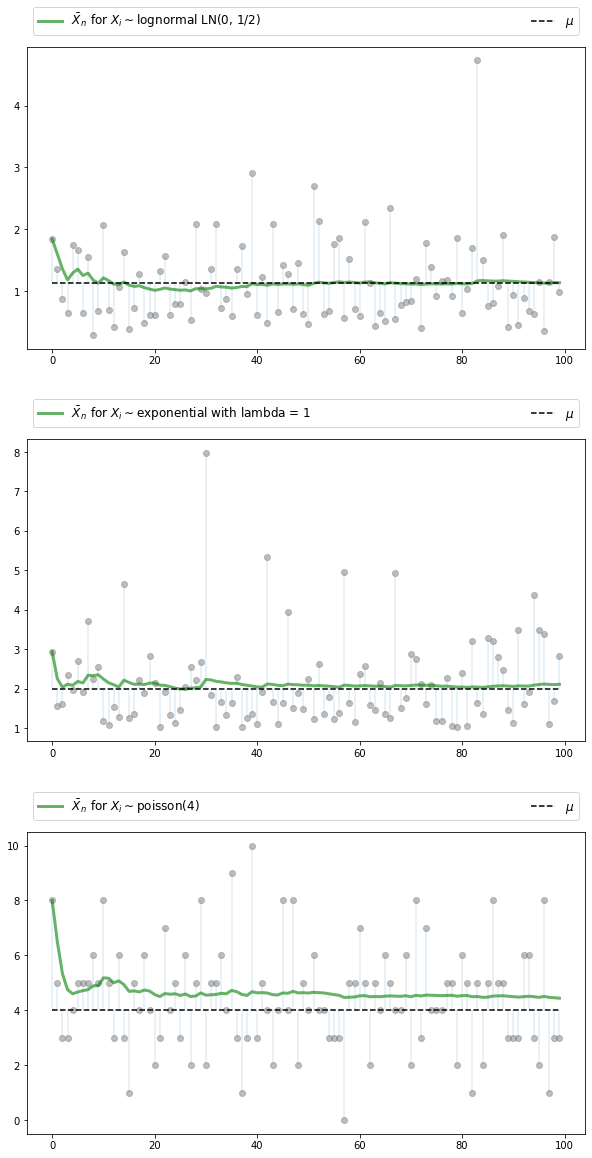

In [10]:
# simulation
n = 100
distributions = {
    "student's t with 10 degrees of freedom": t(10), 
    "beta(2, 2)": beta(2, 2),
    "lognormal LN(0, 1/2)": lognorm(0.5),
    "gamma(5, 1/2)": gamma(5, scale=2),
    "poisson(4)": poisson(4),
    "exponential with lambda = 1": expon(1)
}

# create a figure
num_plots = 3
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 20))

bbox = (0., 1.02, 1., 0.102)  # layout of plots
legend_args = {'ncol': 2,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}
plt.subplots_adjust(hspace=0.3)

for ax in axes:
    name = random.choice(list(distributions.keys()))
    distribution = distributions.pop(name)
    data = distribution.rvs(n)
    
    sample_mean = np.empty(n)
    for i in range(n):
        sample_mean[i] = np.mean(data[:i+1])
    
    ax.plot(list(range(n)), data, 'o', color='grey', alpha=0.5)
    axlabel='$\\bar X_n$ for $X_i \sim $' + name
    ax.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6, label=axlabel)
    m=distribution.mean()
    ax.plot(list(range(n)), [m] * n, 'k--', lw=1.5, label='$\mu$')
    ax.vlines(list(range(n)), m, data, lw=0.2)
    ax.legend(**legend_args, fontsize=12)

plt.show()

### CLT

The central limit theorem is one of the most remarkable results in all of mathematics.

In the classical IID setting, it tells us the following:

If the sequence $X_1, \cdots, X_n$ is IID, with common mean $\mu$ and common variance $\sigma^2 \in (0, \infty)$, then 

$$\sqrt{n} (\bar{X}_n - \mu) \to N(0, \sigma^2)  \ \ as \ \ n \to \infty$$

It means the value of $\sqrt{n} (\bar{X}_n - \mu)$ will converge to the distribution with a centered normal distribution with standard deviation $\sigma$.

The striking implication of the CLT is that for any distribution with finite second moment, the simple operation of adding independent copies always leads to a Gaussian curve. This is the result of _convolution_.

A relatively simple proof of the central limit theorem can be obtained by working with characteristic functions. The proof is elegant but almost anticlimactic, and it provides surprisingly little intuition.In fact, all of the proofs of the CLT that we know are similar in this respect.

We will try to understand CLT based on simulation.

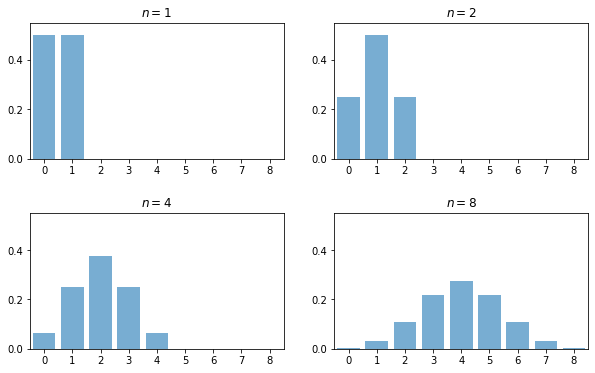

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.4)
axes = axes.flatten()  # this is a smart move
ns = [1, 2, 4, 8]
dom = list(range(9))

for ax, n in zip(axes, ns):
    b = binom(n, 0.5)  # toss the coin
    ax.bar(dom, b.pmf(dom), alpha=0.6, align='center')
    ax.set(xlim=(-0.5, 8.5), ylim=(0, 0.55), xticks=list(range(9)), yticks=(0, 0.2, 0.4),
          title=f'$n={n}$')
plt.show()

When n=1, the distribution is flat — one success or no successes have the same probability.When n=2 we can either have 0, 1 or 2 successes.Notice the peak in probability mass at the mid-point k=4.

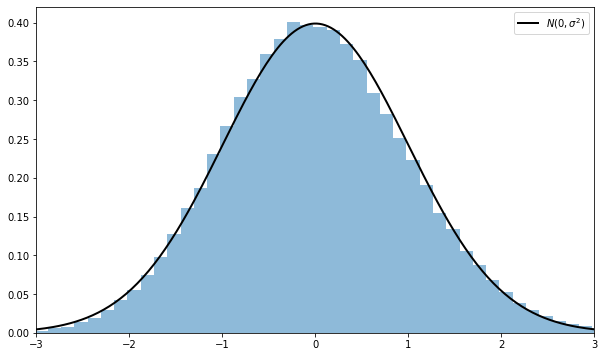

In [15]:
# simulate again
n = 250
k = 100000  # Number of draws of Y_n
distribution = expon(2)  # Exponential distribution, lmabda = 1/2
mu, sigma = distribution.mean(), distribution.std()

# Draw underlying RVs. Each row contains a draw of X_1,..,X_n
data = distribution.rvs((k, n))
# Compute mean of each row, producing k draws of \bar X_n
sample_means = data.mean(axis=1)
# Generate observations of Y_n
Y = np.sqrt(n) * (sample_means - mu)  # CLT

# plot
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * sigma, 3 * sigma
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.5, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, norm.pdf(xgrid, scale=sigma), 'k-', lw=2, label='$N(0, \sigma^2)$')
ax.legend()

plt.show()

In econometrics, you use the chi-squared distribution extensively. The chi-squared distribution is useful for comparing estimated variance values from a sample to those values based on theoretical assumptions. Therefore, it's typically used to develop confidence intervals and hypothesis tests for population variance.

_Assume we know $\sigma$_, then we could have

$$X_1, X_2, \cdots, X_n \sim N(\mu, \sigma^2) \ \ \to \ \ \frac{(n-1)S^2}{\sigma^2} \sim \chi_{n-1}^2$$


When we _don't know $\sigma$_, we use the T distribution:

$$T = \frac{\bar{X} - \mu}{S/ \sqrt{n}}\ \ \sim \ \ N(0, 1)$$

The F-distribution is usually used for comparing variances from two separate sources.

$$\frac{S_1^2/ \sigma_1^2}{S_2^2/ \sigma_2^2} \sim \frac{\chi_{n_1-1}^2 / (n_1 - 1)}{\chi_{n_2 -1}^2 /(n_2-1)}$$

Let $X_1, \cdots, X_n$ is a sequence of IID random vectors, each taking values in $R^k$, $mu = E[X_i]$ and $\Sigma$ is the variance-covariance matrix of $X_i$. The convergence

$$\sqrt{n}(\bar{X}_n - \mu) \to N(0, \Sigma)$$

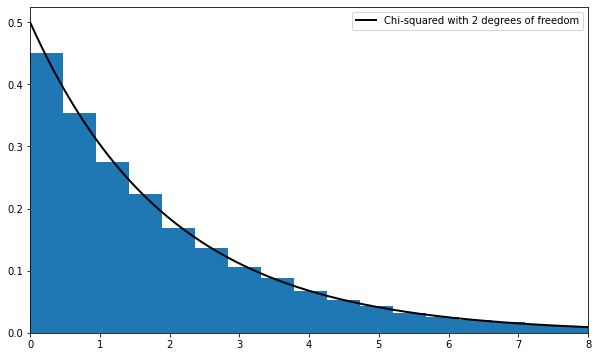

In [20]:
n = 250
replications = 50000
dw = uniform(loc=-1, scale=2)
du = uniform(loc=-2, scale=4)
sw, su = dw.std(), du.std()
vw, vu = sw**2, su**2
covm = ((vw, vw), (vw, vw+vu))
covm = np.array(covm)

Q = inv(sqrtm(covm))

# Generate observations of the normalized sample mean
error_obs = np.empty((2, replications))
for i in range(replications):
    # Generate one sequence of bivariate shocks
    X = np.empty((2, n))
    W = dw.rvs(n)
    U = du.rvs(n)
    # Construct the n observations of the random vector
    X[0, :] = W
    X[1, :] = W + U
    # Construct the i-th observation of Y_n
    error_obs[:, i] = np.sqrt(n) * X.mean(axis=1)

# Premultiply by Q and then take the squared norm
temp = Q @ error_obs
chisq_obs = np.sum(temp**2, axis=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
xmax = 8
ax.set_xlim(0, xmax)
xgrid = np.linspace(0, xmax, 200)
lb = "Chi-squared with 2 degrees of freedom"
ax.plot(xgrid, chi2.pdf(xgrid, 2), 'k-', lw=2, label=lb)
ax.legend()
ax.hist(chisq_obs, bins=50, density=True)
plt.show()